# planck.ipynb
by Hezy Amiel
this script uses Planck's equation to create a set of black body radiation
curves at various temperatures, for each curve find λmax
(the wavelength of maximum radiation)
and use it to plot Wien's law: λmax = b/T

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants
import pandas as pd

In [74]:
# Physical constants
h = constants.value(u'Planck constant')
k = constants.value(u'Boltzmann constant')
c = constants.value(u'speed of light in vacuum')
b = constants.value(u'Wien wavelength displacement law constant')

## Palnck's function
    T = temperature (K), lam = wavelength (nm), l = wavelength (m)
    this calculates the spectral radiance - the power per unit solid angle and
    per unit of area normal to the propagation, density of wavelength λ
    radiation per unit wavelegth at thermal equilibrium at temperature T.

In [75]:
def planck(lam, T):
    # converting nanometer to meter
    l = lam * 1e-9
    # Planck's function
    return (8*np.pi*h*c/l**5)/(np.exp(h*c/(l*k*T)-1))

## Wein's function
    a function for fitting Wien's curve λmax = b/T
    a is due to approximation error, b = Wien's constant (nm*K),
    to be evaluated. expected value is b = 2.8977729e−3 m*K

In [76]:
def wien(x, a, b):
    return a + b/x

## Noise
    Adds noise to a given signal
    sigma_background is the standart deviation of a normal background noise
    sigam_measurment is the standart deviation of a normal noise proportional
    to the signal

In [77]:
def noise(signal, sigma_background, sigma_measurment):
    noisy_signal = (signal
                    + np.random.normal(0, sigma_background, np.size(signal))
                    + signal * np.random.normal(0,
                                                sigma_measurment,
                                                np.size(signal)))
    return noisy_signal

## Write file

In [78]:
def write_file(file_name, title, x, y):
    with open(file_name, 'w') as file:
        file.write(title+'\n')
    df = pd.DataFrame({'wavelength (nm)': x,
                       'Intesity (arb)': y})
    df.to_csv(file_name,
              mode='a',
              index=False,
              header=True,
              sep='\t')

# Create Planck's curves for different temperatures

In [79]:
x = np.arange(400, 2600, 100)  # wavelength (nm)
xfit = np.arange(1, 10000, 1)  # wavelength (nm)
T = np.arange(1500, 5500, 500)  # temperature (K)
Lmax = np.array([])


In [80]:
R0 = 1.12
Rw = 0.32
alpha = 4.5e-3

fitted T = [1480.12997045] +/- [[2.30012217]]
fitted T = [2014.29824731] +/- [[3.65133318]]
fitted T = [2611.49905819] +/- [[57.03936635]]
fitted T = [3086.76216738] +/- [[37.02228282]]
fitted T = [3490.68853864] +/- [[14.14614616]]
fitted T = [3878.77262229] +/- [[95.82882789]]
fitted T = [4607.40229665] +/- [[44.8032658]]
fitted T = [5118.35355211] +/- [[99.29968975]]


/tmp/ipykernel_38363/3160745958.py:5: RuntimeWarning: overflow encountered in exp
  return (8*np.pi*h*c/l**5)/(np.exp(h*c/(l*k*T)-1))


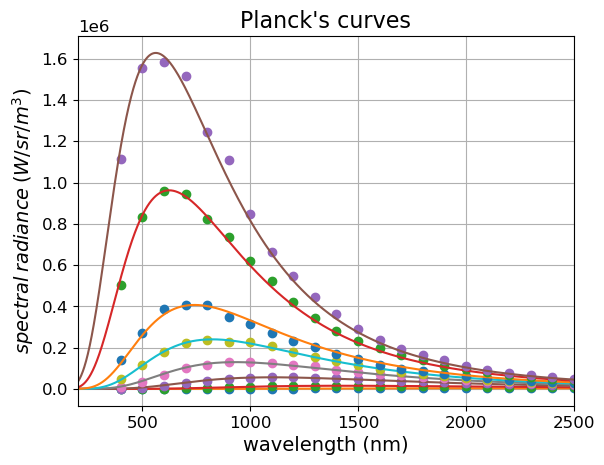

In [81]:
for t in T:
    # R
    R = R0 * (1 + t/293) + Rw

    # creating Planck's curve for temperature = t (with some random noise)
    y = (planck(x, t)) * (1 + np.random.normal(0, 0.1, None))
    y = noise(y, 0, 0.02)
    plt.plot(x, y, "o")

    # fitting Planck's curve for t
    popt, pcov = curve_fit(planck, x, y, 2000)
    print('fitted T =', popt, '+/-', pcov)
    yfit = planck(xfit, *popt)
    
    # Plotting
    plt.plot(xfit, yfit, "-")
    plt.grid(True)
    plt.title("Planck's curves", fontsize=fst)
    plt.xlabel("wavelength (nm)", fontsize=fsl)
    plt.xlim(200, 2500)
    plt.ylabel(r'$spectral \: radiance \: (W/sr/m^3)$', fontsize=fsl)
    
    #write_file(str(t) + 'K.csv', 'T = ' + str(t) + 'K', x, y)
    write_file(str(R) + 'Ohm.csv', 'T = ' + str(R) + 'Ohm', x, y)

    '''
    finding the wavelength of maximal radiance for Planck's curve and
    appending to Wien's curve
    '''
    L = np.argmax(yfit)
    Lmax = np.append(Lmax, np.argmax(yfit))  # TODO



# Fitting Wien's curve with a + b/T

In [88]:
Tfit = np.arange(100, 6000, 100)  # temperature (K)
popt, pcov = curve_fit(wien, T, Lmax)
print('a,b = ')
print(popt)
print('Delta a,b = ')
print(pcov)

a,b = 
[-2.22395801e+01  2.91466120e+06]
Delta a,b = 
[[ 5.67478105e+02 -1.35256091e+06]
 [-1.35256091e+06  3.78611887e+09]]


# Aranging graph 2

a,b = 
[-2.22395801e+01  2.91466120e+06]
Delta a,b = 
[[ 5.67478105e+02 -1.35256091e+06]
 [-1.35256091e+06  3.78611887e+09]]


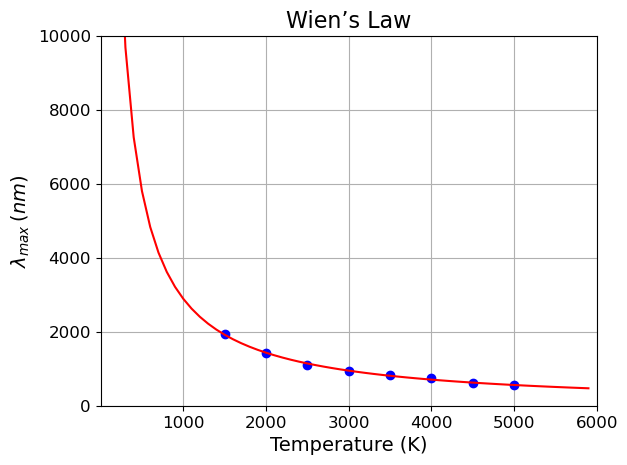

In [90]:
plt.plot(T, Lmax, "bo")
Tfit = np.arange(100, 6000, 100)  # temperature (K)
popt, pcov = curve_fit(wien, T, Lmax)
plt.grid(True)
plt.title("Wien’s Law", fontsize=fst)
plt.xlabel("Temperature (K)", fontsize=fsl)
plt.xlim(1, 6000)
plt.ylabel(r'$\lambda_{max} \: (nm)$', fontsize=fsl)
plt.ylim(0, 10000)
print('a,b = ')
print(popt)
print('Delta a,b = ')
print(pcov)
plt.plot(Tfit, wien(Tfit, *popt), "r-")